In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

In [3]:
y_train = y_train.values.reshape(-1,)

In [4]:

y_test = y_test.values.reshape(-1,)

## Model 1 : Logistic Regression 


In [5]:


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

0.8823246900289554


In [7]:
print("Confusion Matrix: Logistic Regression")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report: Logistic Regression")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix: Logistic Regression
[[173128   1656]
 [ 49063 207161]]
Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.99      0.87    174784
           1       0.99      0.81      0.89    256224

    accuracy                           0.88    431008
   macro avg       0.89      0.90      0.88    431008
weighted avg       0.91      0.88      0.88    431008



Even though Precision score for 1's is high, accuracy is still at 88.23% which means that our model has room for improvement. Overall the model is still performing moderately well for a first pass. 

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

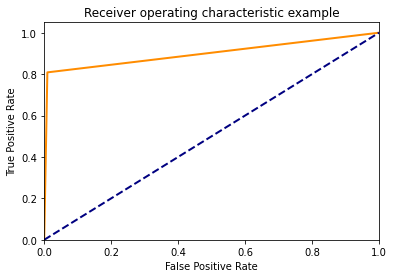

In [9]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred )
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [10]:

print(metrics.roc_auc_score(y_test, y_pred ))

0.8995203269994393


## Model 1: Randomized CV Search on Decision Tree 

In [11]:
tree1 = DecisionTreeClassifier(criterion ='entropy')
tree1.fit(X_train,y_train)
y_pred_t = tree1.predict(X_test)


In [12]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_t))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_t))
print("Classification Report: " )
print(metrics.classification_report(y_test, y_pred_t))

Accuracy: 0.9787428539609474
Balanced accuracy: 0.9800589196326155
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    174784
           1       0.99      0.97      0.98    256224

    accuracy                           0.98    431008
   macro avg       0.98      0.98      0.98    431008
weighted avg       0.98      0.98      0.98    431008



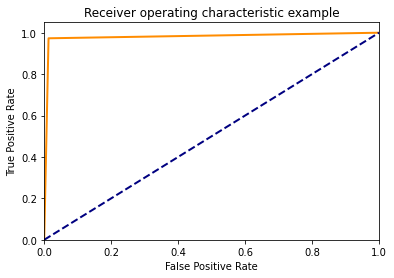

In [13]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_t )
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [14]:

print(metrics.roc_auc_score(y_test, y_pred_t ))

0.9800589196326156


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
params = {"max_depth": np.arange(3,15),
              "max_features": randint(1, 6),
              "min_samples_leaf": randint(1, 6),
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, params, cv=5)
tree_cv.fit(X_train,y_train)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [16]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 14, 'max_features': 4, 'min_samples_leaf': 2}
Best score is 0.9516255987832445


In [17]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=14, max_features=5, min_samples_leaf= 4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [18]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print("Classification Report: " )
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9535971490088351
Balanced accuracy: 0.9601705950623258
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.95    174784
           1       1.00      0.93      0.96    256224

    accuracy                           0.95    431008
   macro avg       0.95      0.96      0.95    431008
weighted avg       0.96      0.95      0.95    431008



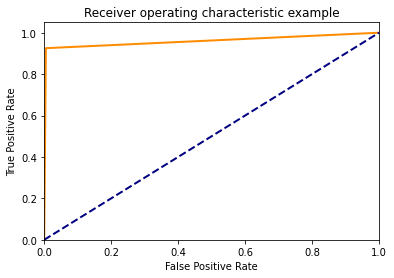

In [19]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred )
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [20]:

print(metrics.roc_auc_score(y_test, y_pred ))

0.9601705950623257


Using a RandomizedSearchCV on a Decision Tree Classifier greatly increased the accuracy score. 

## Model 3 : Gradient Boosting 

First I will try without a RandomizedSearchCV and then will try again to see if I can improve the model.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2,max_depth=2, random_state=0)
gbc.fit(X_train, y_train)
y_pred1 = gbc.predict(X_test)

In [22]:
print('Accuracy score (training) is ' + str(gbc.score(X_train, y_train)))
print('Accuracy score (test) is ' + str(gbc.score(X_test, y_test)))
print('Accuracy Score is ' + str(metrics.accuracy_score(y_pred1, y_test)))

Accuracy score (training) is 0.9434637389450816
Accuracy score (test) is 0.9428688098596778
Accuracy Score is 0.9428688098596778


In [23]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
[[173903    881]
 [ 19119 237105]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.95    174784
           1       1.00      0.93      0.96    256224

    accuracy                           0.95    431008
   macro avg       0.95      0.96      0.95    431008
weighted avg       0.96      0.95      0.95    431008



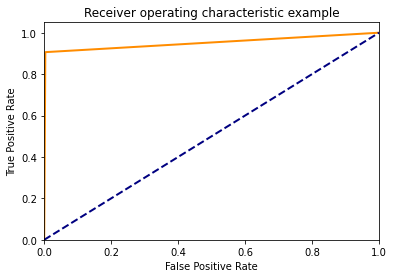

In [24]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1 )
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [25]:

print(metrics.roc_auc_score(y_test, y_pred1 ))

0.951413652574777


Even without a RandomizedSearchCV the Gradient Boosting model is comparable to the previous Decision Tree Classifier. 

In [26]:
params = { 'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], "max_features": randint(1, 6),
              "min_samples_leaf": randint(1, 6), 'n_estimators': np.arange(1,20), 'max_depth' : np.arange(1,15) }
gbc = GradientBoostingClassifier(random_state= 0)
gbc_cv = RandomizedSearchCV(gbc, params, cv=5)
gbc_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [27]:
print("Best Gradient Parameters: {}".format(gbc_cv.best_params_))
print("Best score is {}".format(gbc_cv.best_score_))

Best Gradient Parameters: {'learning_rate': 0.75, 'max_depth': 11, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 10}
Best score is 0.9831020251353841


In [28]:
gbc = GradientBoostingClassifier(n_estimators=9, learning_rate=.75, 
                                 max_features=2,max_depth=14, random_state=0,
                                 min_samples_leaf= 2)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

In [29]:
print('Accuracy score (training) is ' + str(gbc.score(X_train, y_train)))
print('Accuracy score (test) is ' + str(gbc.score(X_test, y_test)))
print('Accuracy Score is ' + str(metrics.accuracy_score(y_pred, y_test)))
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Accuracy score (training) is 0.982789526576488
Accuracy score (test) is 0.9811882842081817
Accuracy Score is 0.9811882842081817
Confusion Matrix:
[[174441    343]
 [  7765 248459]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    174784
           1       1.00      0.97      0.98    256224

    accuracy                           0.98    431008
   macro avg       0.98      0.98      0.98    431008
weighted avg       0.98      0.98      0.98    431008



Another bump in accuracy from tuning the hyperparameters on our Gradient Boosting Classifier. Since it is predicting with 98% accuracy and an F1 score of .98, this will be the model I will use going forward. 


In [30]:
print(gbc.feature_importances_)

[0.14763693 0.00721463 0.66471839 0.14294896 0.03748108]


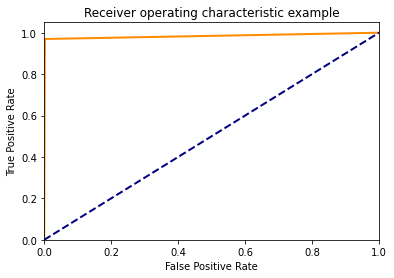

In [31]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred )
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

In [32]:

print(metrics.roc_auc_score(y_test, y_pred ))

0.9838660319425052
